In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [7]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [8]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state  = 32)

In [10]:
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
# Residual
residual = y_test - y_pred

# 1. Linear Relationship

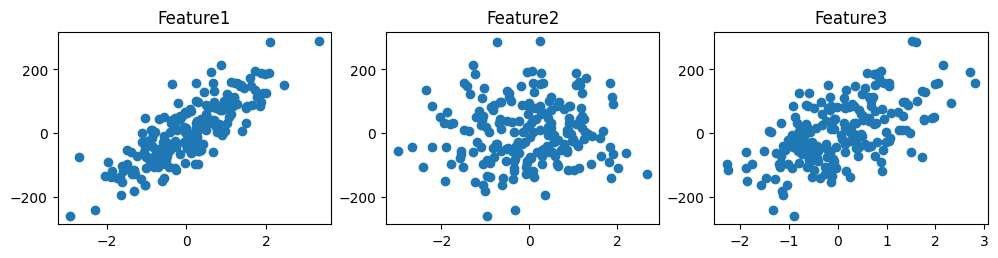

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

# 2. Multicollinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [16]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.011369,1.009005,1.010567


<Axes: >

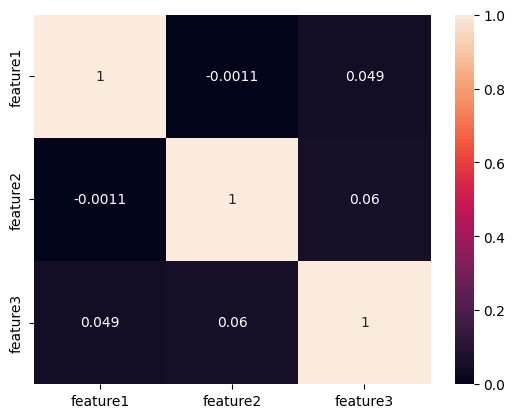

In [17]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

# 3. Normality of Residual

C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\python3.7\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


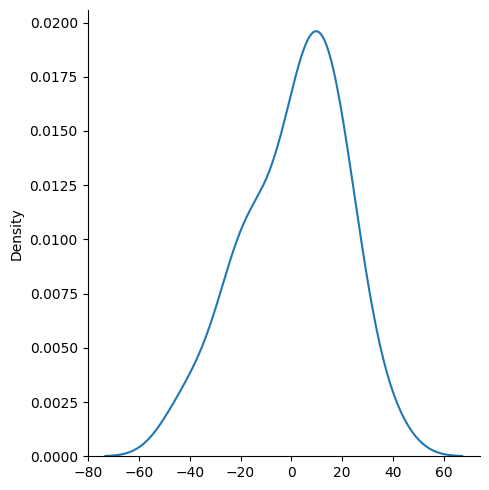

In [18]:
sns.displot(residual,kind='kde')

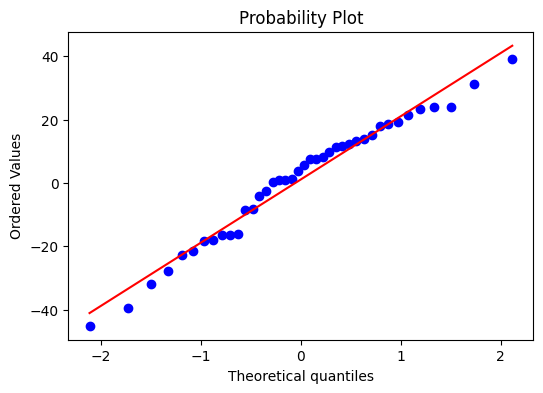

In [19]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

# 4. Homoscedasticity

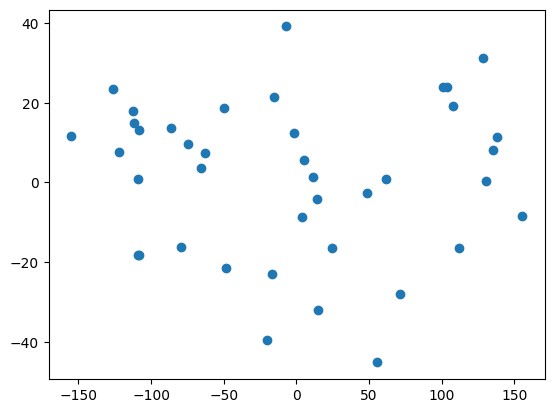

In [21]:
plt.scatter(y_pred, residual)

# 5. Autocorrelation of Residuals

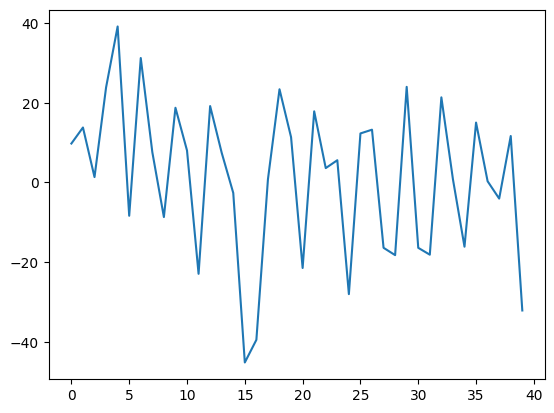

In [22]:
plt.plot(residual)